In [1]:
import cv2 # импорт Open CV
from google.colab.patches import cv2_imshow # cv2_imshow служит для отображения картинок в Google Colab
import numpy as np 
from scipy.spatial import distance as dist
from imutils import perspective
from imutils import contours
import argparse
import imutils
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('Файл(ы) "{name}" размером {length} байт загружен(ы)'.format(
      name=fn, length=len(uploaded[fn])))

Saving Фото1.jpg to Фото1.jpg
Saving Фото2.jpg to Фото2.jpg
Saving Фото3.jpg to Фото3.jpg
Файл(ы) "Фото1.jpg" размером 78603 байт загружен(ы)
Файл(ы) "Фото2.jpg" размером 850282 байт загружен(ы)
Файл(ы) "Фото3.jpg" размером 15196 байт загружен(ы)


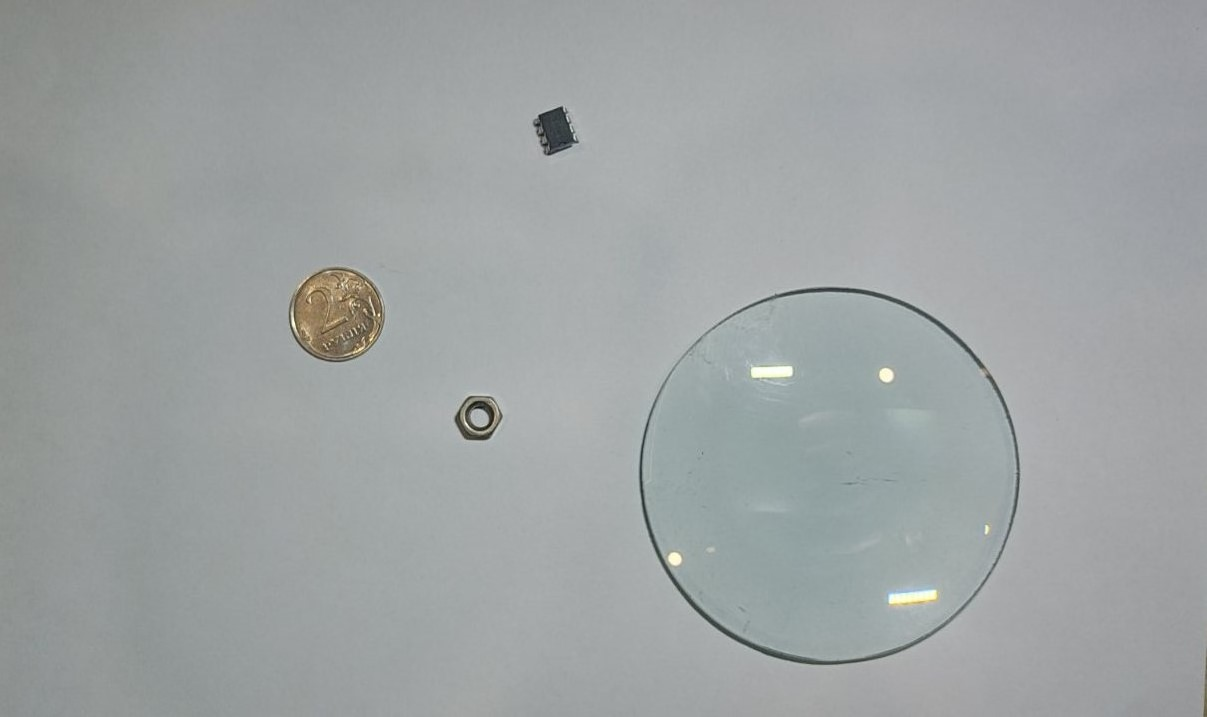

In [3]:
fileName = 'Фото1.jpg' 

image = cv2.imread(fileName) # считываем данные графического файла в переменную image
cv2_imshow(image)

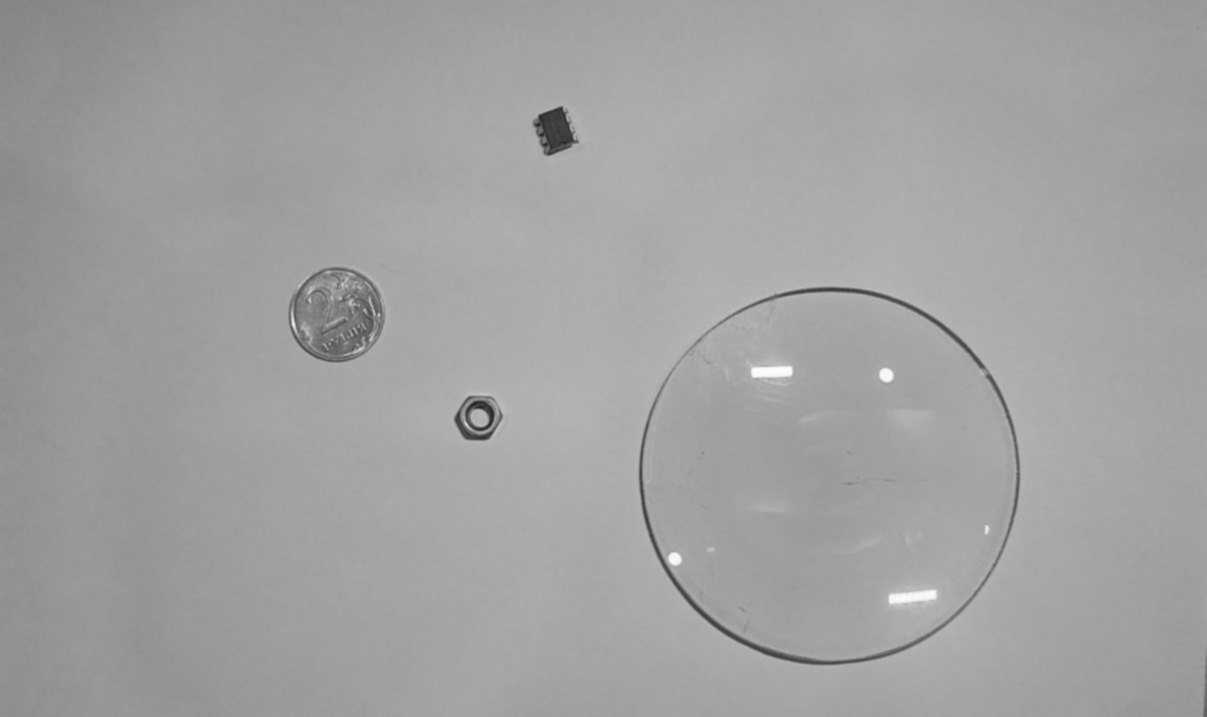

In [4]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # Преобразование в градации серого. openCV  оперирует палитрой BGR

gray = cv2.GaussianBlur(gray, (3, 3), 0) # Фильтр Гаусса с маской 3х3. Отсутствие размытия зачастую дает детекцию ложных объектов

cv2_imshow(gray)

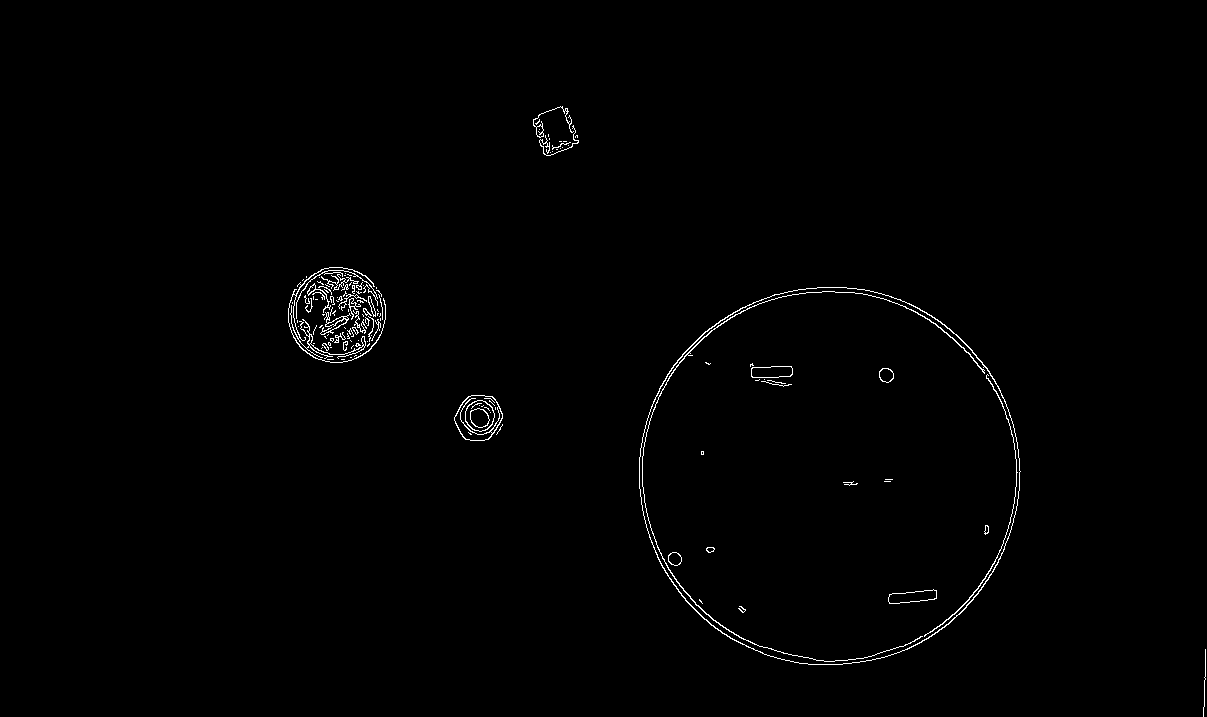

In [5]:
edged = cv2.Canny(gray, 50, 70) # Обнаруживаем края.
cv2_imshow(edged)

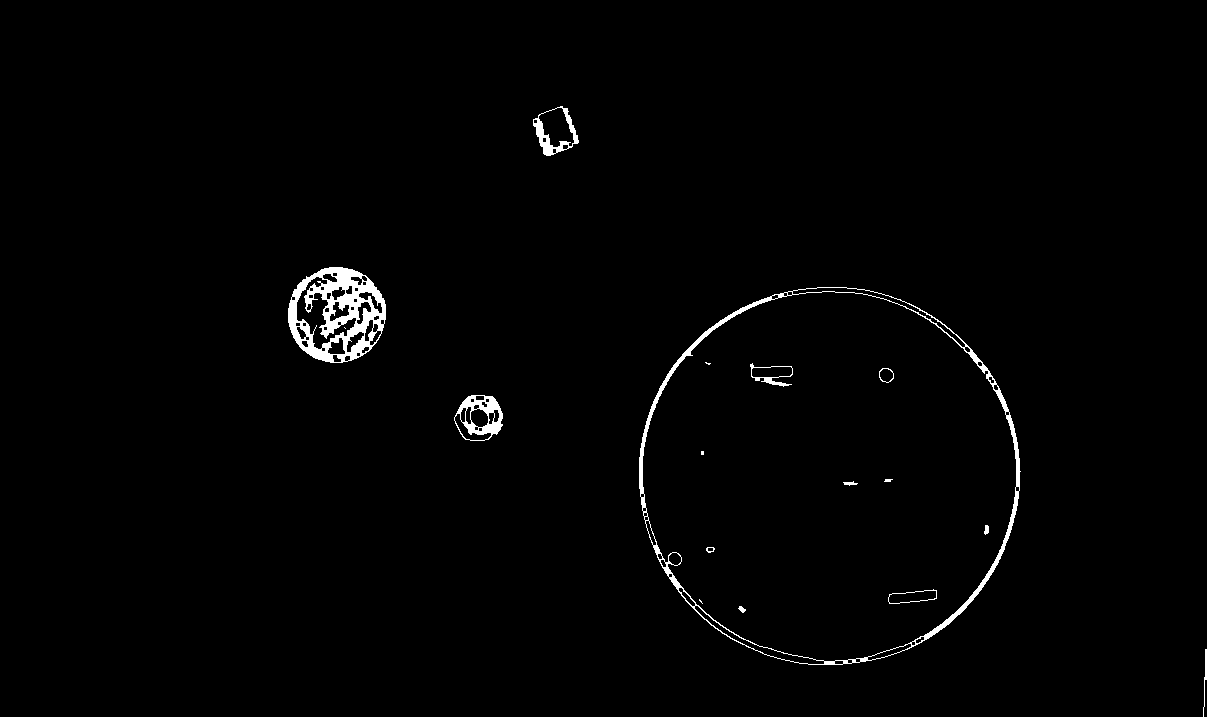

In [6]:
edged = cv2.erode(cv2.dilate(edged, None, iterations=1), None, iterations=1)# Выполняем дилатацию и эрозию, чтобы  получить четкие края
cv2_imshow(edged)

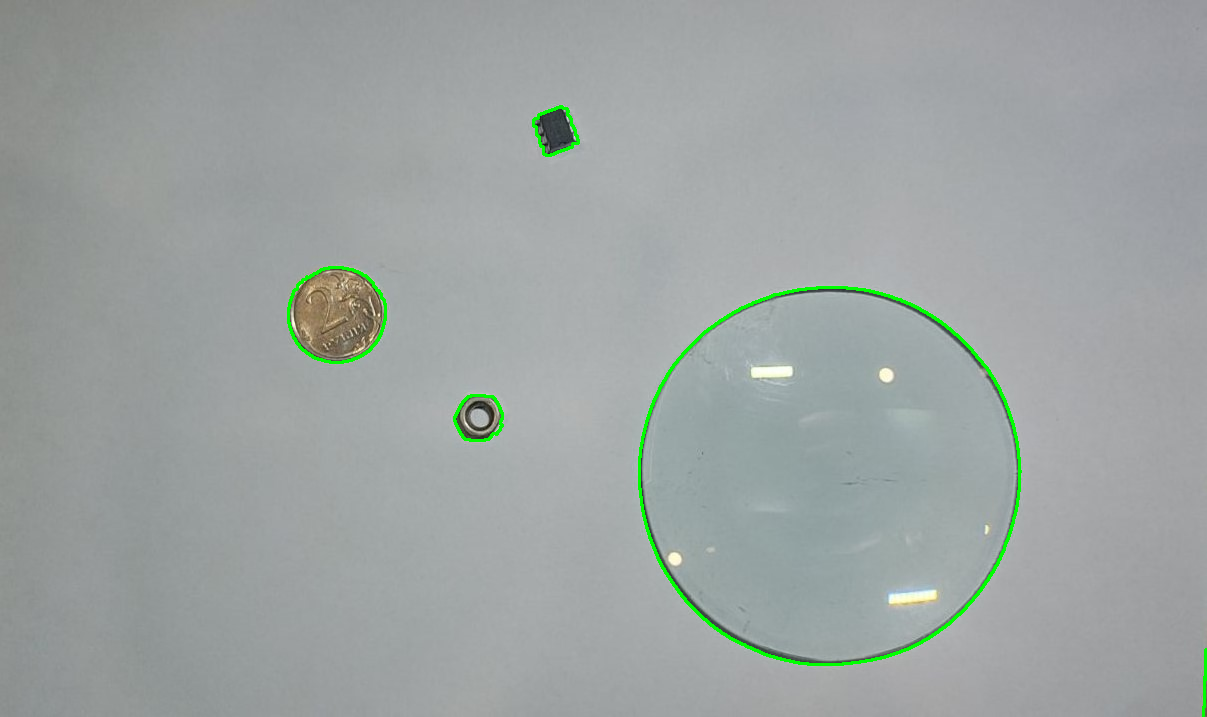

In [7]:
# RETR_EXTERNAL -  находит только внешние контуры, CV_CHAIN_APPROX_SIMPLE — склеивает все горизонтальные, вертикальные и диагональные контуры.
cnts = cv2.findContours(edged, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

(cnts, _) = contours.sort_contours(cnts) # сортируем найденные контуры в порядке слева направо, для определения эталонного (левого) объекта

# визуализация найденных контуров    
cnts_image = image.copy()
cv2.drawContours(cnts_image, cnts, -1, (0, 255, 0), 2)
cv2_imshow(cnts_image)

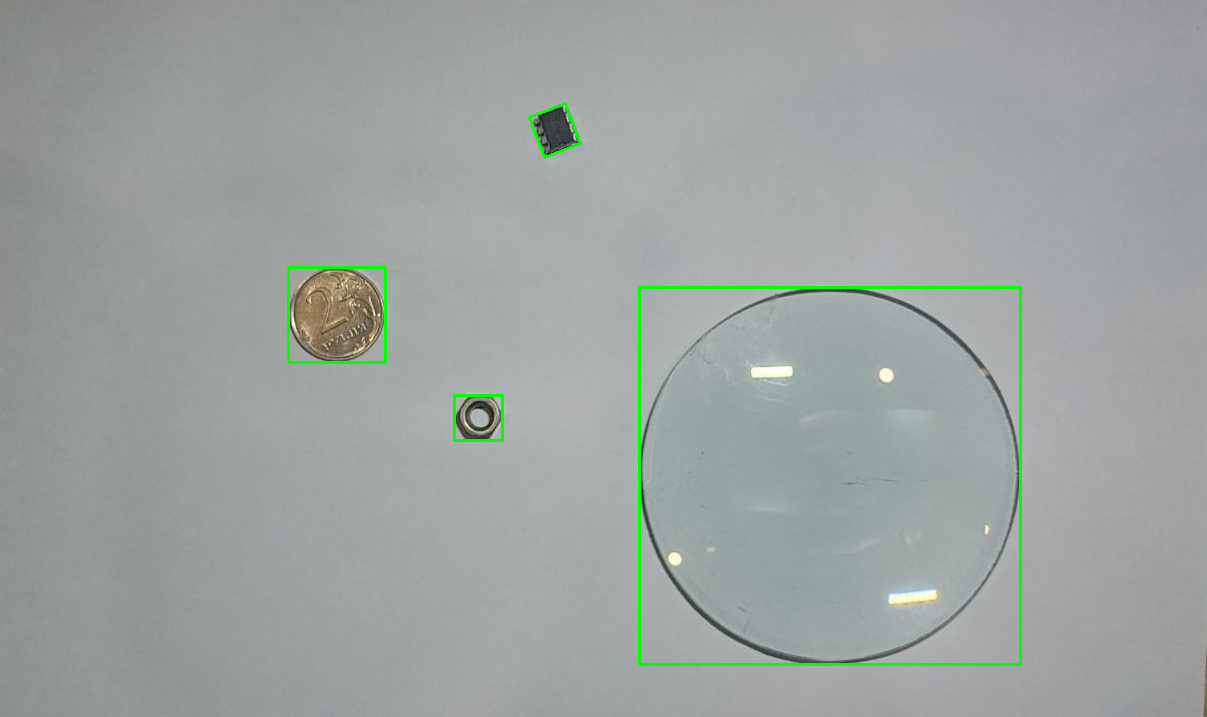

In [8]:
orig = image.copy()
for c in cnts:
    if cv2.contourArea(c) < 1000:# пропускаем маленькие контуры
        continue
    
    box = cv2.minAreaRect(c)# вычисляем рамку ограничивающую контур

    box = cv2.cv.BoxPoints(box) if imutils.is_cv2() else cv2.boxPoints(box)# определяем углы

    box = perspective.order_points(box) # сортируем координаты по часовой стрелке
   
    cv2.drawContours(orig, [box.astype("int")], -1, (0, 255, 0), 2) # рисуем рамку, openCV  оперирует палитрой BGR

cv2_imshow(orig)

In [9]:
def midpoint(ptA, ptB):# функция вычисления средней точки
   return ((ptA[0] + ptB[0]) * 0.5, (ptA[1] + ptB[1]) * 0.5)

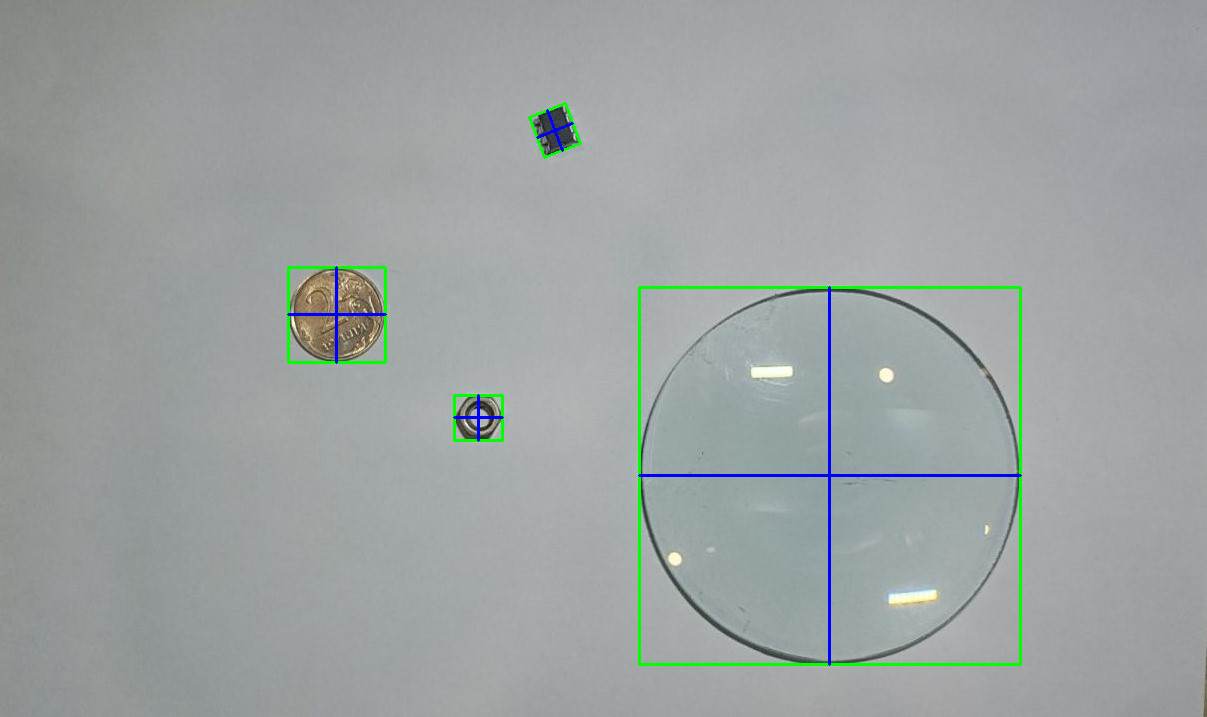

In [10]:
orig = image.copy()
for c in cnts:
    if cv2.contourArea(c) < 1000:# пропускаем маленькие контуры
        continue
    
    box = cv2.minAreaRect(c)# вычисляем рамку ограничивающую контур

    box = cv2.cv.BoxPoints(box) if imutils.is_cv2() else cv2.boxPoints(box)# определяем углы

    box = perspective.order_points(box) # сортируем координаты по часовой стрелке
   
    cv2.drawContours(orig, [box.astype("int")], -1, (0, 255, 0), 2) # рисуем рамку, openCV  оперирует палитрой BGR

    # 4 средних точки габаритной рамки
    (tl, tr, br, bl) = box
    (tltrX, tltrY) = midpoint(tl, tr)
    (blbrX, blbrY) = midpoint(bl, br)
    (tlblX, tlblY) = midpoint(tl, bl)
    (trbrX, trbrY) = midpoint(tr, br)

      
    # средние линии синим цветом
    cv2.line(orig, (int(tltrX), int(tltrY)), (int(blbrX), int(blbrY)), (255, 0, 0), 2) 
    cv2.line(orig, (int(tlblX), int(tlblY)), (int(trbrX), int(trbrY)), (255, 0, 0), 2)


cv2_imshow(orig)

In [11]:
pixelsPerMillimetr = None # инициализируем переменную pixelsPerMillimetr
width = 23.0

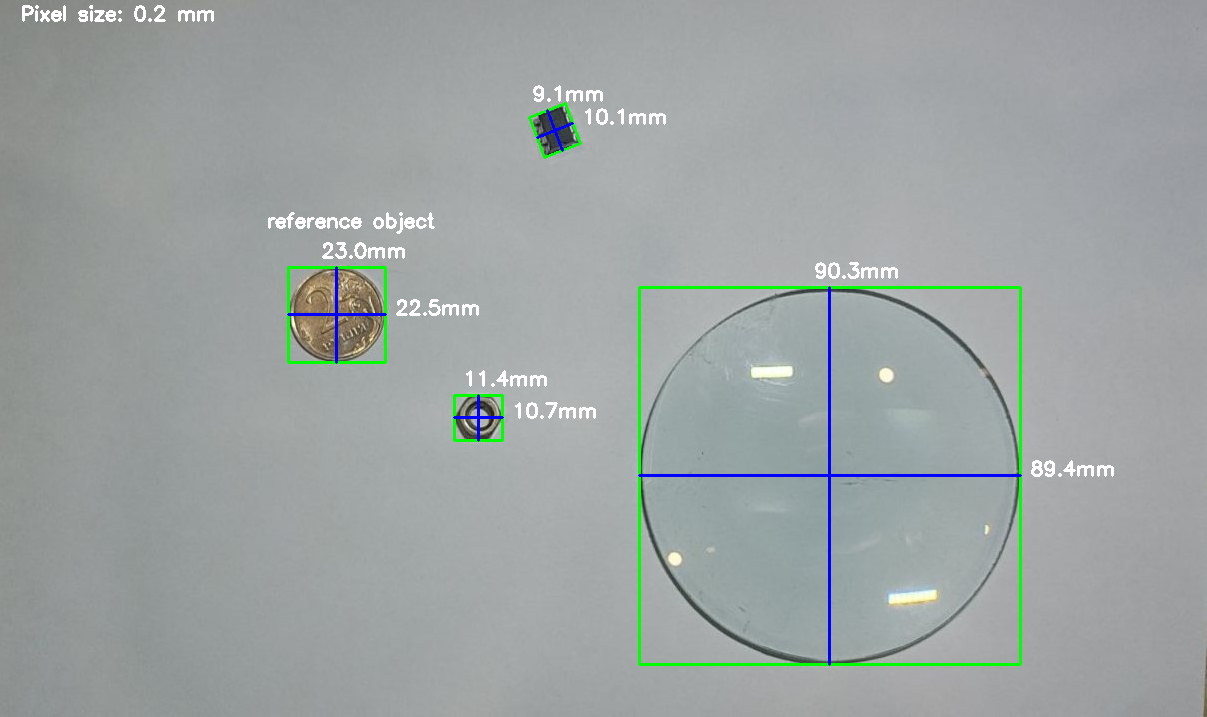

In [12]:
orig = image.copy()
for c in cnts:
    if cv2.contourArea(c) < 1000:# пропускаем маленькие контуры
        continue
    
    box = cv2.minAreaRect(c)# вычисляем рамку ограничивающую контур

    box = cv2.cv.BoxPoints(box) if imutils.is_cv2() else cv2.boxPoints(box)# определяем углы

    box = perspective.order_points(box) # сортируем координаты по часовой стрелке
   
    cv2.drawContours(orig, [box.astype("int")], -1, (0, 255, 0), 2) # рисуем рамку, openCV  оперирует палитрой BGR

    # 4 средних точки габаритной рамки
    (tl, tr, br, bl) = box
    (tltrX, tltrY) = midpoint(tl, tr)
    (blbrX, blbrY) = midpoint(bl, br)
    (tlblX, tlblY) = midpoint(tl, bl)
    (trbrX, trbrY) = midpoint(tr, br)

      
    # средние линии синим цветом
    cv2.line(orig, (int(tltrX), int(tltrY)), (int(blbrX), int(blbrY)), (255, 0, 0), 2) 
    cv2.line(orig, (int(tlblX), int(tlblY)), (int(trbrX), int(trbrY)), (255, 0, 0), 2)

    dA = dist.euclidean((tltrX, tltrY), (blbrX, blbrY))
    dB = dist.euclidean((tlblX, tlblY), (trbrX, trbrY))

    # Если переменная pixelsPerMillimetr неопределена, значит идет вычисление
    # самого левого объекта, который является эталонным и его размер известен
    if pixelsPerMillimetr is None:
        pixelsPerMillimetr = dB / width

        cv2.putText(orig, "reference object",
        (int(tltrX - 70), int(tltrY - 40)), cv2.FONT_HERSHEY_SIMPLEX,
        0.65, (255, 255, 255), 2)
        

    # вычисляем  размер пикселя
    dimA = dA / pixelsPerMillimetr
    dimB = dB / pixelsPerMillimetr

    # наносим размер объекта на изображение
    cv2.putText(orig, "{:.1f}mm".format(dimB),
        (int(tltrX - 15), int(tltrY - 10)), cv2.FONT_HERSHEY_SIMPLEX, 0.65, (255, 255, 255), 2)

    cv2.putText(orig, "{:.1f}mm".format(dimA),
        (int(trbrX + 10), int(trbrY)), cv2.FONT_HERSHEY_SIMPLEX, 0.65, (255, 255, 255), 2)

    #  выводим размер пикселя
    cv2.putText(orig, "Pixel size: {:.1f} mm".format(1/pixelsPerMillimetr),(20, 20), cv2.FONT_HERSHEY_SIMPLEX,
        0.65, (255, 255, 255), 2)

cv2_imshow(orig)